<a href="https://colab.research.google.com/github/mumtehaartun/pandas/blob/main/sklearn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!wget https://raw.githubusercontent.com/mumtehaartun/pandas/0c528a8711fd59ee166c4e507ac8b219074019ed/housing_price_dataset.csv

--2023-11-30 10:48:39--  https://raw.githubusercontent.com/mumtehaartun/pandas/0c528a8711fd59ee166c4e507ac8b219074019ed/housing_price_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1944010 (1.9M) [text/plain]
Saving to: ‘housing_price_dataset.csv’

housing_price_datas 100%[===================>]   1.85M  --.-KB/s    in 0.08s   

2023-11-30 10:48:39 (23.5 MB/s) - ‘housing_price_dataset.csv’ saved [1944010/1944010]



In [13]:
!ls

housing_price_dataset.csv  sample_data


In [14]:
import pandas as pd

df = pd.read_csv('housing_price_dataset.csv')

print(df)

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]


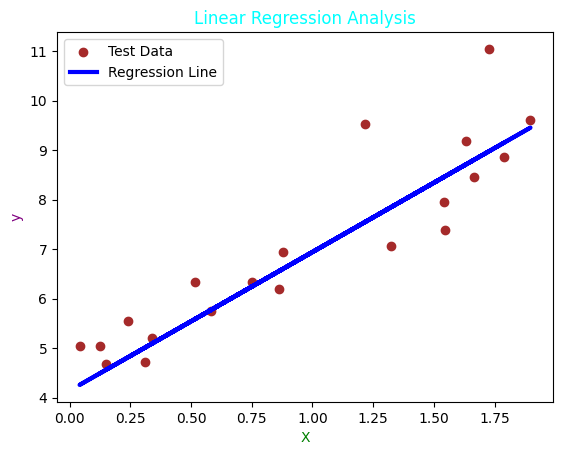

Model Coefficients: [2.79932366]
Model Intercept: 4.142913319458566
Mean Squared Error: 0.6536995137170021
Root Mean Squared Error: 0.8085168605026132
R-squared: 0.8072059636181392


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

data = pd.DataFrame(data=np.column_stack([X, y]), columns=['X', 'y'])

X_train, X_test, y_train, y_test = train_test_split(data['X'].values.reshape(-1, 1), data['y'].values, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

plt.scatter(X_test, y_test, color='brown', label='Test Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('X', color='green')
plt.ylabel('y', color='purple')
plt.title('Linear Regression Analysis', color='cyan')
plt.legend()
plt.show()

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

columns_to_encode = ['Neighborhood']

data = pd.read_csv('housing_price_dataset.csv')

data_encoded = pd.get_dummies(data, columns=columns_to_encode)

X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
print('Score: \n', reg.score(X_test, y_test))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [  99.34424664 5230.28498499 2968.50090091   -5.70699352 -273.55711806
 -869.08798284 1142.6451009 ]
Intercept: 
 12596.430675888696
Score: 
 0.5755628630306235
Mean squared error: 2436249371.31
Coefficient of determination: 0.58


In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)


Mean squared error: 2436249371.31
